In [11]:
def jacobi(a, n) -> int:
    if n <= 0:
        raise ValueError("'n' must be a positive integer.")
    if n % 2 == 0:
        raise ValueError("'n' must be odd.")
    a %= n
    result = 1
    while a != 0:
        while a % 2 == 0:
            a /= 2
            n_mod_8 = n % 8
            if n_mod_8 in (3, 5):
                result = -result
        a, n = n, a
        if a % 4 == 3 and n % 4 == 3:
            result = -result
        a %= n
    if n == 1:
        return result
    else:
        return 0

In [9]:
def GCD(x, y) -> int:
   return gmpy2.gcd(x, y)

In [10]:
def squareness(n) -> bool:
  return gmpy2.is_square(n)

In [ ]:
def lucas_simple(n):
    if n==0:
        return 0
    if n==1:
        return 1
    return lucas_simple(n-1) + lucas_simple(n-2)

In [ ]:
lucas_simple(16), lucas_simple(16) % 17

(987, 1)

In [8]:
def binary(n):
  binary = []
  while (n > 0):
    binary.append(n%2)
    n //= 2
  return binary[::-1]

In [7]:
def lucas_U_seq(P, Q, mod, n):
  f_even = lambda Uk, Uk1: ((2*Uk*Uk1 - P*Uk**2) % mod, (Uk1**2 - Q*Uk**2) % mod)
  f_odd  = lambda Uk, Uk1: ((Uk1**2 - Q*Uk**2) % mod, (P*Uk1**2 - 2*Q*Uk*Uk1) % mod)
  f_cond = lambda Uk, Uk1, bit: (f_odd(Uk, Uk1)) if bit & 1 else (f_even(Uk, Uk1))
  accumulator = (0, 1)
  U = list()
  U.append(accumulator)
  for i in binary(n):
    accumulator = f_cond(accumulator[0], accumulator[1], i)
    U.append(accumulator)
  return U

In [ ]:
lucas_U_seq(1, 2, 17, 18)

[(0, 1), (1, 1), (1, 16), (14, 16), (0, 6), (0, 2)]

In [6]:
def lucas_Vn(P, Q, Un, Un1, mod):
  return ((-P)*Un + 2*Un+1) % mod

In [5]:
def get_primes(n):
  numbers = list(range(2, n + 1))
  for number in numbers:
      if number != 0:
          for candidate in range(2 * number, n+1, number):
              numbers[candidate-2] = 0    
  return list(filter(lambda x: x != 0, numbers))

In [4]:
def guess_params(n):
  # select the first D = {5, −7, 9, −11, 13, −15, ...} such that (D/n) == -1
  # note that if D is square then (D/n) == 1
  if squareness(n):
    raise ValueError("{} is square".format(n))
  
  P = 1
  D = 5
  sign = -1
  while jacobi(D, n) != -1 or (1 - D) // 4 == -1 or (1 - D) // 4 == 1:
    D = -D + sign * 2
    sign *= -1

  Q = (1 - D) // 4

  return (P, Q, D)


In [3]:
def spsp2(n) -> bool:
  d = n - 1
  s = 0
  while d % 2 == 0:
    d //= 2
    s += 1
  pow_d = gmpy2.powmod(2, d, n)
  if pow_d == 1:
    return True
  for r in range(s):
    if pow_d * gmpy2.powmod(2, gmpy2.powmod(2, r, n), n) % n == 1:
      return True

  return False

In [13]:
!apt install libmpc-dev
!pip install gmpy2
import gmpy2;

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgmp-dev libgmpxx4ldbl libmpfr-dev
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-doc
The following NEW packages will be installed:
  libgmp-dev libgmpxx4ldbl libmpc-dev libmpfr-dev
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 625 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmpxx4ldbl amd64 2:6.1.2+dfsg-2 [8,964 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmp-dev amd64 2:6.1.2+dfsg-2 [316 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmpfr-dev amd64 4.0.1-1 [249 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmpc-dev 

In [ ]:
primes = get_primes(1014)

In [20]:
first_primes_check = False

In [23]:
def lucas_pseudoprime_test(n) -> bool:
  # step 1: check for divisibility of some primes
  if n == 1:
    return True
  if first_primes_check:
    for prime in primes:
      if n % prime == 0 and n != prime:
        print("{} divides by {}".format(n, prime))
        return False
    
  # step 2: spsp(2) test
  if spsp2(n):
    # print("{} is spsp(2)".format(n))
    return False
      
  # step 3: get params using John Selfridge method, it includes squareness check
  # we guarantee that (D/n) = -1 and Q != {1, -1}
  P, Q, D = guess_params(n)
  # print("n = {}, P = {}, Q = {}, D = {}".format(n, P, Q, D))
  U_list = lucas_U_seq(P, Q, n, n + 1)
  # get Un+1 and Un+2
  Un1 = U_list[-1][0]
  Un2 = U_list[-1][1]
  # print("Un+1 = {} (mod {})".format(Un1, n))
  if Un1 != 0:
    return False

  # step 4: slpsp(P, Q)
  d = n + 1
  s = 0
  while d % 2 == 0:
    d //= 2
    s += 1
  r = 1
  gcdd = GCD(U_list[-s][0], n)
  if 1 < gcdd < n:
    print("GCD(Ue, n) <= 1 or GCD(Ue, n) >= n")
    return False
  while r <= s:
    Ud2r1 = U_list[-r][0]
    Ud2r2 = U_list[-r][1]
    Vd2e1 = lucas_Vn(P, Q, Ud2r1, Ud2r2, n)
    if 1 < GCD(Vd2e1, n) < n:
      print("GCD(Vd2e1, n) <= 1 or GCD(Vd2e1, n) >= n")
      return False
    r += 1
  
  
  # step 5: check additional condition
  g2qd = GCD(n, 2*Q*D)
  #print("GCD(n, 2QD) = {}".format(g2qd))

  if 1 < g2qd <= n:
    return False

  # get Vn+1
  Vn1 = lucas_Vn(P, Q, Un1, Un2, n)
  if Vn1 == 2*Q:
    return False

  # there n may be prime or slpsp

  return True

In [ ]:
lucas_pseudoprime_test(100000000000000000005)

False

In [ ]:
lucas_U_seq(1, 2, 17, 9)

[(0, 1), (1, 1), (1, 16), (14, 16), (0, 6)]

In [ ]:
lucas_Vn(1, 2, 0, 6, 17)

1

In [ ]:
lucas_pseudoprime_test(999999000001)

True

In [ ]:
lucas_pseudoprime_test(67280421310721)

True

In [ ]:
lucas_pseudoprime_test(5210644015679228794060694325390955853335898483908056458352183851018372555735221)

True

In [12]:
!pip install matplotlib
!pip install numpy
import os
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
def draw_plot(x,y):
  xsize = len(x)
  xnew = list(range(1, xsize+1))

  print(xnew)
  fig = plt.figure()
  plt.plot(xnew, y,'k')

  plt.xlim(0, xsize)
  plt.ylim(0, np.max(y))

  plt.ylabel(u'Time [s]', fontsize=12)
  plt.xlabel(u'Element number [c]', fontsize=12)
  plt.grid(True, color='w')

  plt.show()

In [21]:
simple_under10 = [7]
simple_under100 = [17, 31, 37, 43, 53, 59, 61, 67, 71, 89, 97]
simple_under1000 = [109, 157, 223, 293, 383, 463, 569, 647, 743, 839, 941]
simple_under10000 = [1013, 1069, 1123, 1231, 1399, 1483, 1559, 1607, 1693, 1733, 1801, 1867, 2029, 2281, 2539, 3499, 3889, 4423, 4759, 5507, 5783, 6133, 6761, 7001, 7757, 7901, 8527, 9007, 9901, 9949]
simple = simple_under10 + simple_under100 + simple_under1000 + simple_under10000
lucas_numbers = [2, 1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199, 322, 521, 843, 1364, 2207, 3571, 5778, 9349, 15127, 24476, 39603, 64079, 103682, 167761, 271443, 439204, 710647, 1149851, 1860498, 3010349, 4870847, 7881196, 12752043, 20633239, 33385282, 54018521, 87403803]
eiler_numbers = [561, 1105, 1729, 1905, 2047, 2465, 3277, 4033, 4681, 6601, 8321, 8481, 10585]
maik_numbers = [1, 7, 16, 43,	105, 255,	646,	1547,	3605,	8241,	19279,	44706,	105212,	246683]
catalan_numbers = [5907,1194649,12327121]
karl_mikes_numbers = [561, 41041, 825265, 321197185, 5394826801, 232250619601, 9746347772161, 1436697831295441, 60977817398996785, 7156857700403137441, 1791562810662585767521, 87674969936234821377601, 6553130926752006031481761, 1590231231043178376951698401, 35237869211718889547310642241]
simple_under_max = [7482895937713262392883306949172917048928068129206401, 1320340354477450170682291329830138947225695029536281601, 379382381447399527322618466130154668512652910714224209601, 70416887142533176417390411931483993124120785701395296424001, 2884167509593581480205474627684686008624483147814647841436801, 4754868377601046732119933839981363081972014948522510826417784001, 1334733877147062382486934807105197899496002201113849920496510541601, 260849323075371835669784094383812120359260783810157225730623388382401, 112505380450296606970338459629988782604252033209350010888227147338120001]


In [15]:
def lucas_test(i) -> bool:
  try:
    res = lucas_pseudoprime_test(i)
    return res
  except ValueError:
    return False

In [16]:
import time
def f_time(i):
  start_time = time.time()
  lucas_test(i)
  t = time.time() - start_time
  return t

In [17]:
import pandas as pd
def times_tables(elems, t):
  times = list(map(lambda x: x * 1000000, t))
  times_table = pd.DataFrame(
      {'numbers': elems,
        'time': times
      })

In [18]:
def results(l):
  stime=[]
  for i in l: stime.append(f_time(i))
  print("###ELEMENTS###")
  print(l)
  print("###ELEMENTS LEN###")
  print(len(l))
  print("###TIME###")
  print(stime)
  print("###TIME LEN###")  
  print(len(stime))
  print("###TIME AVERAGE###")
  print(sum(stime) / len(stime))
  draw_plot(l, stime)
  return l, stime

###ELEMENTS###
[7, 17, 31, 37, 43, 53, 59, 61, 67, 71, 89, 97, 109, 157, 223, 293, 383, 463, 569, 647, 743, 839, 941, 1013, 1069, 1123, 1231, 1399, 1483, 1559, 1607, 1693, 1733, 1801, 1867, 2029, 2281, 2539, 3499, 3889, 4423, 4759, 5507, 5783, 6133, 6761, 7001, 7757, 7901, 8527, 9007, 9901, 9949]
###ELEMENTS LEN###
53
###TIME###
[4.673004150390625e-05, 9.632110595703125e-05, 3.814697265625e-06, 4.839897155761719e-05, 4.124641418457031e-05, 5.316734313964844e-05, 3.4332275390625e-05, 0.00043487548828125, 6.341934204101562e-05, 3.337860107421875e-06, 2.86102294921875e-06, 4.172325134277344e-05, 4.029273986816406e-05, 3.933906555175781e-05, 3.0994415283203125e-06, 4.100799560546875e-05, 2.6226043701171875e-06, 1.9073486328125e-06, 5.1021575927734375e-05, 3.0994415283203125e-06, 2.1457672119140625e-06, 2.1457672119140625e-06, 5.91278076171875e-05, 4.887580871582031e-05, 4.9591064453125e-05, 5.030632019042969e-05, 3.337860107421875e-06, 2.384185791015625e-06, 8.058547973632812e-05, 3.576278

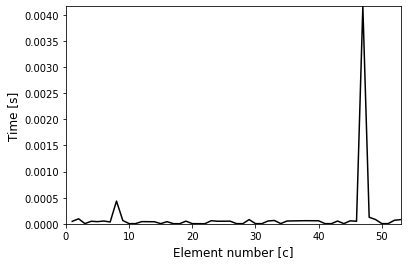

,numbers,time
0,7,46.730042
1,17,96.321106
2,31,3.814697
3,37,48.398972
4,43,41.246414
5,53,53.167343
6,59,34.332275
7,61,434.875488
8,67,63.419342
9,71,3.337860


In [24]:
elems, times = results(simple)
t = list(map(lambda x: x * 1000000, times))
times_table = pd.DataFrame(
      {'numbers': elems,
        'time': t
      })
times_table

2047 is spsp(2)
4681 is spsp(2)
###ELEMENTS###
[561, 1105, 1729, 1905, 2047, 2465, 3277, 4033, 4681, 6601, 8321, 8481, 10585]
###ELEMENTS LEN###
13
###TIME###
[8.296966552734375e-05, 3.504753112792969e-05, 3.910064697265625e-05, 3.5762786865234375e-05, 7.319450378417969e-05, 5.793571472167969e-05, 6.079673767089844e-05, 7.2479248046875e-05, 3.981590270996094e-05, 6.67572021484375e-05, 4.2438507080078125e-05, 4.100799560546875e-05, 5.030632019042969e-05]
###TIME LEN###
13
###TIME AVERAGE###
5.366252018855168e-05
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


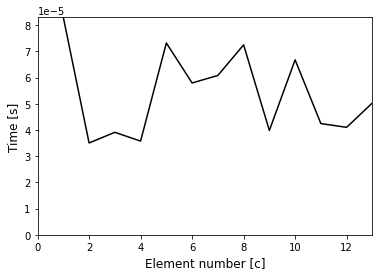

,numbers,time
0,561,82.969666
1,1105,35.047531
2,1729,39.100647
3,1905,35.762787
4,2047,73.194504
5,2465,57.935715
6,3277,60.796738
7,4033,72.479248
8,4681,39.815903
9,6601,66.757202


In [ ]:
elems, times = results(eiler_numbers)
t = list(map(lambda x: x * 1000000, times))
times_table = pd.DataFrame(
      {'numbers': elems,
        'time': t
      })
times_table

7 is spsp(2)
255 is spsp(2)
###ELEMENTS###
[1, 7, 16, 43, 105, 255, 646, 1547, 3605, 8241, 19279, 44706, 105212, 246683]
###ELEMENTS LEN###
14
###TIME###
[3.814697265625e-06, 0.0022051334381103516, 4.506111145019531e-05, 7.867813110351562e-05, 6.246566772460938e-05, 8.225440979003906e-05, 1.5020370483398438e-05, 6.151199340820312e-05, 6.437301635742188e-05, 5.4836273193359375e-05, 5.0067901611328125e-05, 6.4373016357421875e-06, 3.5762786865234375e-06, 5.5789947509765625e-05]
###TIME LEN###
14
###TIME AVERAGE###
0.00019921575273786272
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


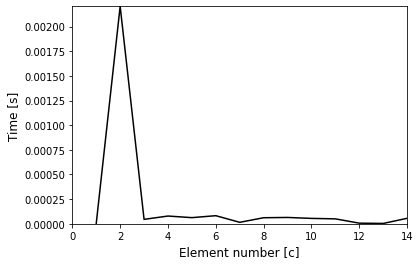

,numbers,time
0,1,3.814697
1,7,2205.133438
2,16,45.061111
3,43,78.678131
4,105,62.465668
5,255,82.254410
6,646,15.020370
7,1547,61.511993
8,3605,64.373016
9,8241,54.836273


In [ ]:
elems, times = results(maik_numbers)
t = list(map(lambda x: x * 1000000, times))
times_table = pd.DataFrame(
      {'numbers': elems,
        'time': t
      })
times_table

###ELEMENTS###
[561, 41041, 825265, 321197185, 5394826801, 232250619601, 9746347772161, 1436697831295441, 60977817398996785, 7156857700403137441, 1791562810662585767521, 87674969936234821377601, 6553130926752006031481761, 1590231231043178376951698401, 35237869211718889547310642241]
###ELEMENTS LEN###
15
###TIME###
[0.00011229515075683594, 8.368492126464844e-05, 0.0001201629638671875, 0.00016450881958007812, 0.0001614093780517578, 0.0001552104949951172, 0.000171661376953125, 0.00017023086547851562, 0.0001285076141357422, 0.00021910667419433594, 0.0002498626708984375, 0.0002684593200683594, 0.00028586387634277344, 0.000408172607421875, 0.0004336833953857422]
###TIME LEN###
15
###TIME AVERAGE###
0.00020885467529296875
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


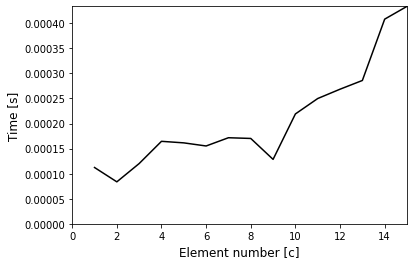

,numbers,time
0,561,112.295151
1,41041,83.684921
2,825265,120.162964
3,321197185,164.508820
4,5394826801,161.409378
5,232250619601,155.210495
6,9746347772161,171.661377
7,1436697831295441,170.230865
8,60977817398996785,128.507614
9,7156857700403137441,219.106674


In [ ]:
elems, times = results(karl_mikes_numbers)
t = list(map(lambda x: x * 1000000, times))
times_table = pd.DataFrame(
      {'numbers': elems,
        'time': t
      })
times_table

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



14591557381683869894037762062805150819033523054131458991041257231 is spsp(2)
16894567851553799472996715631581492272653386263473814460582364567 is spsp(2)
27055827178105778879361685914509028572321790982613076644217127849 is spsp(2)
33192692134475954856270930251709138881169486089533481750139920471 is spsp(2)
42634358213914655843035082045115227191271333058657667140950374831 is spsp(2)
43529479933012471200242415943266858125425586831301603313623080063 is spsp(2)
45636027282154736495301895514031933162521183043455747831486731919 is spsp(2)
58537663029392119320037637628079173524896307858646701673821989319 is spsp(2)
59019407553084842649182625438765301812619634262659556181824936479 is spsp(2)
65589125392635668507035195023912506544152081770192845707032102681 is spsp(2)
67136147144701204873979860950163824469738169973087110615855411359 is spsp(2)
79786940292241400899257547102158423625039486418282346055624862063 is spsp(2)
90333964973943981164429904992805414149860603947066154570252631887 is spsp(2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



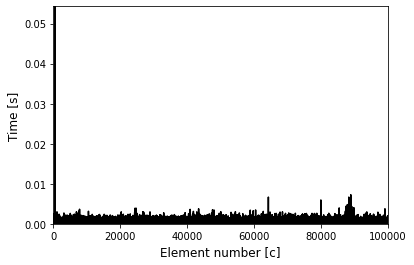

,numbers,time
0,6733974060010387942028919804137638618847819250...,1215.934753
1,1594770468195995137198226318679565724081204434...,1106.023788
2,1862780623162812421337319876560938457648400808...,924.110413
3,2447024053024593281896558386675138172241949834...,697.851181
4,2503702015235777829528058257337496172817062164...,24.795532
...,...,...
99995,9999631271219942145612576956613867856198993233...,1267.433167
99996,9999780507666691704443308535020746647254814668...,954.151154
99997,9999849772418215791631872493135969936358342588...,25.510788
99998,9999876063349828755228193244654882571940967892...,16.689301


In [ ]:
import random
l =[]
for i in range(100000): l.append(random.randint(1, 1000000000000000000001000000000000000000001000000000000000000001000))
l.sort()
print(l)

elems, times = results(l)
t = list(map(lambda x: x * 1000000, times))
times_table = pd.DataFrame(
      {'numbers': elems,
        'time': t
      })
times_table

In [ ]:
from itertools import islice


def primes():
    if hasattr(primes, "D"):
        D = primes.D
    else:
        primes.D = D = {}

    def sieve():
        q = 2
        while True:
            if q not in D:
                yield q
                D[q * q] = [q]
            else:
                for p in D[q]:
                    D.setdefault(p + q, []).append(p)
                del D[q]

            q += 1

    return sieve()

simple_slice=list(islice(primes(), 0, 100000))
#print(list(simple_slice))

Streaming output truncated to the last 5000 lines.
1032887 is spsp(2)
1032943 is spsp(2)
1032959 is spsp(2)
1033001 is spsp(2)
1033007 is spsp(2)
1033033 is spsp(2)
1033063 is spsp(2)
1033079 is spsp(2)
1033127 is spsp(2)
1033223 is spsp(2)
1033271 is spsp(2)
1033273 is spsp(2)
1033303 is spsp(2)
1033343 is spsp(2)
1033423 is spsp(2)
1033463 is spsp(2)
1033559 is spsp(2)
1033567 is spsp(2)
1033631 is spsp(2)
1033663 is spsp(2)
1033679 is spsp(2)
1033687 is spsp(2)
1033751 is spsp(2)
1033759 is spsp(2)
1033783 is spsp(2)
1033807 is spsp(2)
1033927 is spsp(2)
1033951 is spsp(2)
1034009 is spsp(2)
1034071 is spsp(2)
1034119 is spsp(2)
1034167 is spsp(2)
1034183 is spsp(2)
1034207 is spsp(2)
1034233 is spsp(2)
1034239 is spsp(2)
1034281 is spsp(2)
1034359 is spsp(2)
1034479 is spsp(2)
1034489 is spsp(2)
1034503 is spsp(2)
1034567 is spsp(2)
1034591 is spsp(2)
1034599 is spsp(2)
1034639 is spsp(2)
1034767 is spsp(2)
1034783 is spsp(2)
1034791 is spsp(2)
1034857 is spsp(2)
1034863 is spsp(2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



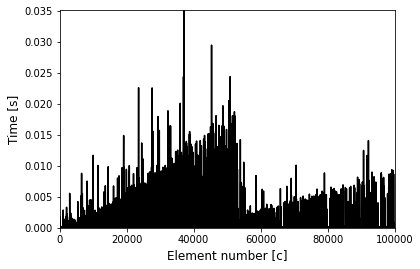

,numbers,time
0,2,38.146973
1,3,1304.626465
2,5,69.379807
3,7,464.439392
4,11,47.206879
...,...,...
99995,1299647,26.941299
99996,1299653,77.009201
99997,1299673,58.650970
99998,1299689,51.021576


In [ ]:
elems, times = results(simple_slice)
t = list(map(lambda x: x * 1000000, times))
times_table = pd.DataFrame(
      {'numbers': elems,
        'time': t
      })
times_table

In [ ]:
import pandas as pd
elems = [561, 41041, 825265, 321197185, 5394826801, 232250619601, 9746347772161, 1436697831295441, 60977817398996785, 7156857700403137441, 1791562810662585767521, 87674969936234821377601, 6553130926752006031481761, 1590231231043178376951698401, 35237869211718889547310642241]
times = list(map(lambda x: x * 1000000, [0.00023102760314941406, 0.00014829635620117188, 0.000164031982421875, 0.0002346038818359375, 0.000213623046875, 0.00026726722717285156, 0.00027060508728027344, 0.000396728515625, 0.0003457069396972656, 0.00047516822814941406, 0.0005028247833251953, 0.0004947185516357422, 0.0006957054138183594, 0.0005919933319091797, 0.0005550384521484375]))
times_table = pd.DataFrame(
    {'numbers': elems,
     'time': times
    })

In [ ]:
times_table

,numbers,time
0,561,231.027603
1,41041,148.296356
2,825265,164.031982
3,321197185,234.603882
4,5394826801,213.623047
5,232250619601,267.267227
6,9746347772161,270.605087
7,1436697831295441,396.728516
8,60977817398996785,345.706940
9,7156857700403137441,475.168228


In [ ]:
times_table()